In [1]:
!ls ../Datos/OwnFats/

koi_light_curves_FATS2_metadata_test.csv
koi_light_curves_FATS2_metadata_train.csv
koi_light_curves_FATS2_metadata_unlabeled.csv


In [201]:
#metricas de evaluacion
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def calculate_metrics(y_true,y_pred):
    f1 = f1_score(y_true,y_pred,average="weighted")
    p = precision_score(y_true,y_pred,average=None,labels=[0,1]) #1 confirmado y 0 false positivo
    r = recall_score(y_true,y_pred,average=None,labels=[0,1])
    #c = completeness_score(y_true, y_pred)
    #h = homogeneity_score(y_true,y_pred)
    return f1,p,r #f1score,completness and homogeneite

In [202]:
df_sets.shape

(8054, 2)

In [203]:
df_sets = pd.read_csv("../Datos/koi_sets.csv")
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
#fijo para todos los datos
#df_meta = pd.read_csv("../Datos/kepler_downloaded.txt",)
df_meta = pd.read_csv("../Datos/koi_metadata.csv")
#df_meta.drop(0,axis=0,inplace=True)
#df_meta.dropna(subset=['DV Summary'],inplace=True)

In [211]:
df_meta_train = df_meta[mask_train] 
df_meta_test = df_meta[mask_test]

In [212]:
y_train = ((df_meta_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_meta_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_meta_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.974570,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239


In [198]:
strings=[]
for columna in df_meta.columns:
    try:
        float(df_meta[columna].values[0])
    except:
        strings.append(columna)
len(strings)

3

In [199]:
df_meta.shape

(8054, 31)

In [168]:
for columna in df_meta.columns:
    if columna in strings:
        df_meta.drop([columna],axis=1,inplace=True)

In [205]:
df_meta.shape

(8054, 31)

In [213]:
todos_ceros = np.zeros(y_test.shape)
todos_uno = np.ones(y_test.shape)

print("Score si dice todos son falsos positivos: %f"%f1_score(y_test,todos_ceros,average="weighted"))
print("Score si dice todos son confirmados: %f"%f1_score(y_test,todos_uno,average="weighted"))

Score si dice todos son falsos positivos: 0.235117
Score si dice todos son confirmados: 0.441917


/users/mbugueno/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/mbugueno/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'Count')

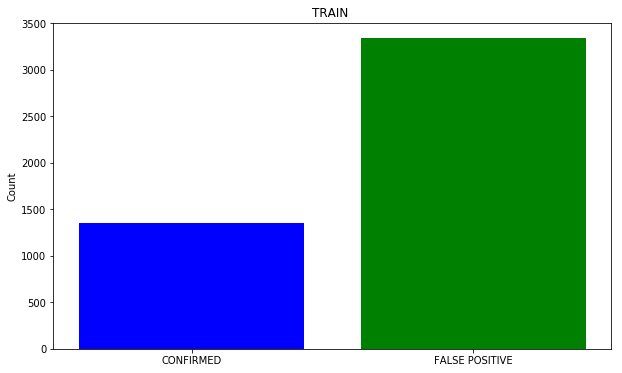

In [214]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("TRAIN ")
plt.bar(0, np.sum(y_train==1),color="blue")
plt.bar(1, np.sum(y_train==0),color="green")
plt.xticks([0,1],["CONFIRMED","FALSE POSITIVE"])
plt.ylabel("Count")
#sns.countplot(y_train[mask])

Text(0,0.5,'Count')

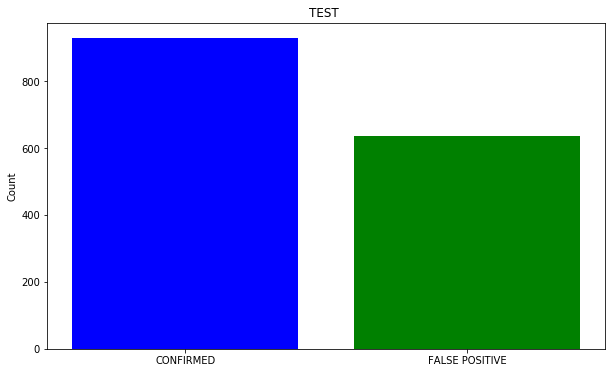

In [215]:
plt.figure(figsize=(10,6))
plt.title("TEST ")
plt.bar(0, np.sum(y_test==1),color="blue")
plt.bar(1, np.sum(y_test==0),color="green")
plt.xticks([0,1],["CONFIRMED","FALSE POSITIVE"])
plt.ylabel("Count")

## VARIAR REPRESENTACION ACA:

In [242]:
#para distintas representaciones...
df_fats_train = pd.read_csv('../Datos/OwnFats/koi_light_curves_FATS2_metadata_train_p_error.csv')
df_fats_test = pd.read_csv('../Datos/OwnFats/koi_light_curves_FATS2_metadata_test_p_error.csv')
#df_algo_test = pd.read_csv('OwnFats/koi_light_curves_FATS2_metadatastellar_test.csv',header=None,names=columns_fats2)

#para koi con valores nulos (Son falsos positivos asi que no afecta)
#para fats2 -brither oppace ratio
df_fats_train.fillna(df_fats_train.median(), inplace=True)
df_fats_test.fillna(df_fats_test.median(), inplace=True)

#df_meta_train.fillna(df_meta_train.median(), inplace=True)
#df_meta_test.fillna(df_meta_test.median(), inplace=True)
#df_meta_train.fillna(0, inplace=True)
#df_meta_test.fillna(0, inplace=True)

X_train = df_fats_train.values[:,:-1]
X_test = df_fats_test.values[:,:-1]
#X_train = df_meta_train.values
#X_test = df_meta_test.values

print(X_train.shape)

(4693, 72)


In [24]:
#from skrebate import ReliefF

## SUBSAMPLE (CLASE MAYORITARIA - FALSE POSITIVE)

In [243]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

Xstd_train = std.fit_transform(X_train.astype('float'))

Xstd_test = std.transform(X_test)

/users/mbugueno/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Empieza ejecución útil: 

In [218]:
#para guardar scores y graficar
f1_score_test = []
p_test = []
r_test = []

## SVM Lineal

In [ ]:
from sklearn.svm import SVC

Cs = [0.01,0.1,1,10,100]

def find_best_c(X_train,y_train,X_val,y_val):
    best = 0
    best_c = 0
    
    for c in Cs:
        model = SVC(kernel= 'linear',C=c)
        model.fit(X_train,y_train)

        ypred_val = model.predict(X_val)
        f1,p,r = calculate_metrics(y_val,ypred_val)

        if f1 > best:
            best = f1
            best_c = c
    print("Mejor c en SVM lineal es %f con f1-score de %f"%(best_c,best))
    return best_c

#leer archivos, iterar y 
best_c = find_best_c(Xstd_train,y_train,Xstd_val,y_val)

## SVM No Lineal

In [57]:
from sklearn.svm import SVC

Cs = [0.001,0.01,0.1,1,10,100,1000]

def find_best_c(X_train,y_train,X_val,y_val):
    best = 0
    best_c = 0
    
    for c in Cs:
        model = SVC(kernel= 'rbf',C=c,gamma='auto',class_weight = 'balanced')
        model.fit(X_train,y_train)

        ypred_val = model.predict(X_val)
        f1,p,r = calculate_metrics(y_val,ypred_val)

        if f1 > best:
            best = f1
            best_c = c
    print("Mejor c en SVM no lineal es %f con f1-score de %f"%(best_c,best))
    return best_c

#leer archivos, iterar y 
best_c = find_best_c(Xstd_train,y_train,Xstd_val,y_val) #not sampled
#best_c = find_best_c(Xstd_train,ysample_train,Xstd_val,y_val) #sampled

Mejor c en SVM no lineal es 1000.000000 con f1-score de 0.864072


In [58]:
model = SVC(kernel='rbf',C=best_c,class_weight = 'balanced')
model.fit(Xstd_train,y_train) #not sampled
#model.fit(Xstd_train,ysample_train) #sampled

ypred_test = model.predict(Xstd_test)
f1,p,r = calculate_metrics(y_test,ypred_test)

f1_score_test.append(f1)
p_test.append(p)
r_test.append(r)

## Random Forest

### código grid

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, f1_score, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_jobs=-1, random_state=0)#, class_weight = 'balanced')

# This takes a while to run with more values,
# I found these as the best parameteres.
param_grid = {
    'n_estimators' : [10,15,20,30,37,40
                     
                     ],
    'min_samples_split': [5,10,15],
    'max_depth': np.arange(5,25),
    #'class_weight' : ['balanced','balanced_subsample',None]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score_we':make_scorer(f1_score,average='weighted'),
    'f1_score_macro':make_scorer(f1_score,average='macro'),
    'f1_score_micro':make_scorer(f1_score,average='micro')
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False , n_jobs=-1)
grid_search.fit(X_train, y_train)

# make the predictions
#y_pred = grid_search.predict(X_test)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))
# confusion matrix on the test data.
#confusion = pd.DataFrame(confusion_matrix(y_test, y_pred),
#             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos'])

In [245]:
f1_ad = []
p_ad = []
r_ad = []
for i in range(20):
    model = RandomForestClassifier(n_jobs=-1,**grid_search.best_params_)
    model.fit(X_train,y_train) 
 
    ypred_test = model.predict(X_test)
    f1,p,r = calculate_metrics(y_test,ypred_test)
    f1_ad.append(f1)
    p_ad.append(p)
    r_ad.append(r)
f1_score_test.append(np.mean(f1_ad,axis=0))# por columna
p_test.append(np.mean(p_ad,axis=0)) #por columna
r_test.append(np.mean(r_ad,axis=0)) #por columna

In [246]:
f1_score_test

[0.8635966326439204,
 0.8634985207069221,
 0.8643145539204685,
 0.8563978041603996,
 0.8597387433060607,
 0.8659704902885892,
 0.8867807789490705]

In [222]:
p_test

[array([0.85787924, 0.86869172])]

In [223]:
r_test

[array([0.79937107, 0.90905172])]

In [57]:
len(model.feature_importances_)

43

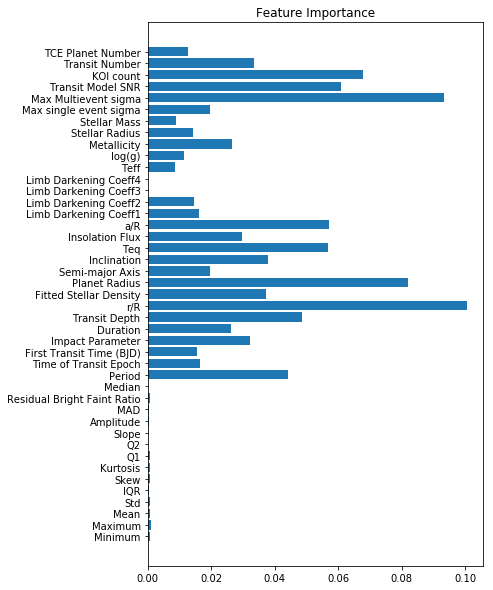

In [232]:
#columns = ["minimo","maximo","media","std","iqr","skw","kurt","q1","q2","slope","period","transitdepth",
#          "teq","koi count",'Planet Radius']
columns_fats2=df_fats_train.columns[:-1]
"""columns_fats2 = ["minimum","maximum","mean","std","iqr","skewness","kurtosis","q1","q2","slope",
                  "amplitute","median absolute deviation","residual bright faint ratio","median", #new ones
                 "period","transit depth","teq","koi count",'Planet Radius',#] #planet
                "Teff","log(g)","Metallicity","Stellar Radius","Stellar Mass"] #stellar
"""
plt.figure(figsize=(6,10))
plt.barh(range(len(columns_fats2)), model.feature_importances_)
plt.yticks(range(len(columns_fats2)),columns_fats2)#, rotation= 30)
plt.title('Feature Importance')
plt.show()

In [225]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, f1_score, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight = 'balanced')

# This takes a while to run with more values,
# I found these as the best parameteres.
param_grid = {
    'n_estimators' : [5,7,10,12,13,15,17,20,30],
    'max_depth': np.arange(1,21)
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score':make_scorer(f1_score,average='macro')
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score',
                       cv=skf, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

# make the predictions
#y_pred = grid_search.predict(X_test)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(preci))
f1 = float(bestResults['mean_test_f1_score'])
print('F1-score: {:.4f}'.format(f1))
# confusion matrix on the test data.
#confusion = pd.DataFrame(confusion_matrix(y_test, y_pred),
#             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos'])

('Best params for completeness:', {'n_estimators': 17, 'max_depth': 15})
Completion: 0.8795
Contamination: 0.9024
F1-score: 0.9235


In [226]:
f1_ad = []
p_ad = []
r_ad = []
for i in range(20):
    model = RandomForestClassifier(n_jobs=-1,**grid_search.best_params_)
    model.fit(X_train,y_train) 
 
    ypred_test = model.predict(X_test)
    f1,p,r = calculate_metrics(y_test,ypred_test)
    f1_ad.append(f1)
    p_ad.append(p)
    r_ad.append(r)
f1_score_test.append(np.mean(f1_ad,axis=0))# por columna
p_test.append(np.mean(p_ad,axis=0)) #por columna
r_test.append(np.mean(r_ad,axis=0)) #por columna

In [227]:
f1_score_test

[0.8635966326439204, 0.8634985207069221]

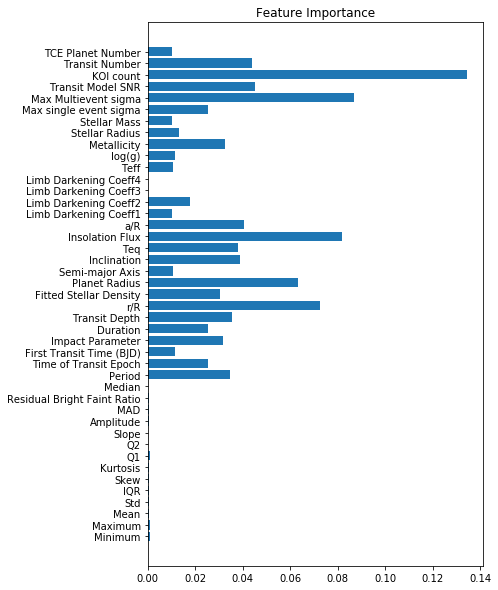

In [228]:
columns_fats2=df_fats_train.columns[:-1]
"""columns_fats2 = ["minimum","maximum","mean","std","iqr","skewness","kurtosis","q1","q2","slope",
                  "amplitute","median absolute deviation","residual bright faint ratio","median", #new ones
                 "period","transit depth","teq","koi count",'Planet Radius',#] #planet
                "Teff","log(g)","Metallicity","Stellar Radius","Stellar Mass"] #stellar
"""
plt.figure(figsize=(6,10))
plt.barh(range(len(columns_fats2)), model.feature_importances_)
plt.yticks(range(len(columns_fats2)),columns_fats2)#, rotation= 30)
plt.title('Feature Importance')
plt.show()

### Red Neuronal (como clasificador binario)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf

earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto')

with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(1024, input_dim=Xstd_train.shape[1], activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.2))
    #model.add(Dense(256, activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))

    model.compile('rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(Xstd_train, ysample_train, epochs=100, batch_size=16, verbose=2,
              validation_data=(Xstd_val,y_val),callbacks=[earlyStopping])

Train on 3142 samples, validate on 1074 samples
Epoch 1/100
2s - loss: 0.6686 - acc: 0.5605 - val_loss: 0.6167 - val_acc: 0.5847
Epoch 2/100
2s - loss: 0.6368 - acc: 0.5926 - val_loss: 0.6111 - val_acc: 0.5764
Epoch 3/100
2s - loss: 0.6308 - acc: 0.6063 - val_loss: 0.6493 - val_acc: 0.5829
Epoch 4/100
2s - loss: 0.6223 - acc: 0.5987 - val_loss: 0.6112 - val_acc: 0.5931
Epoch 5/100
2s - loss: 0.6169 - acc: 0.6130 - val_loss: 0.6117 - val_acc: 0.6043
Epoch 6/100
2s - loss: 0.6084 - acc: 0.6244 - val_loss: 0.5924 - val_acc: 0.6071
Epoch 7/100
2s - loss: 0.6102 - acc: 0.6152 - val_loss: 0.6320 - val_acc: 0.5940
Epoch 8/100
2s - loss: 0.6035 - acc: 0.6248 - val_loss: 0.5961 - val_acc: 0.5996
Epoch 9/100
2s - loss: 0.6073 - acc: 0.6238 - val_loss: 0.5895 - val_acc: 0.5950
Epoch 10/100
2s - loss: 0.6085 - acc: 0.6143 - val_loss: 0.5829 - val_acc: 0.5978
Epoch 11/100
2s - loss: 0.6018 - acc: 0.6194 - val_loss: 0.6163 - val_acc: 0.5866
Epoch 12/100
2s - loss: 0.6008 - acc: 0.6222 - val_loss: 0.

In [17]:
ypred_val = model.predict_classes(Xstd_test)
f1,p,r = calculate_metrics(y_test,ypred_val)
print("")
print("F1 sobre validation: ",f1)

 576/1139 [==============>...............] - ETA: 0s
('F1 sobre validation: ', 0.58618401830923994)


In [18]:
print(p,r)

(array([ 0.88855422,  0.47707559]), array([ 0.41143654,  0.91232227]))


# Gráficos

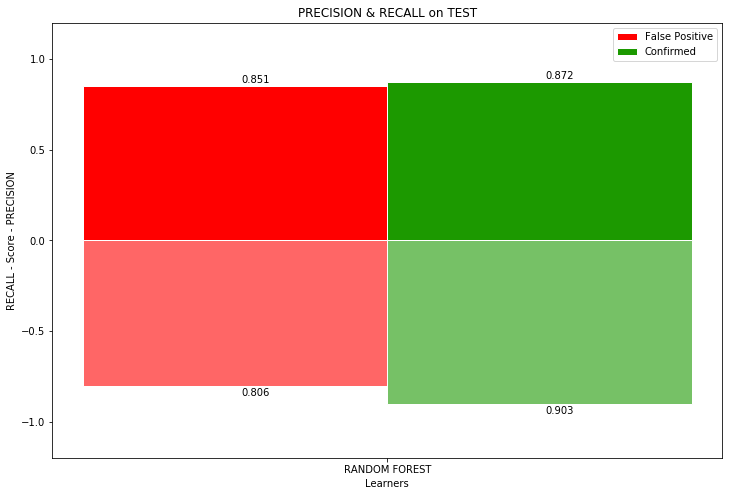

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

learners = len(p_test)
M = np.arange(learners)

#PRECISION SCORES
aux = list(map(list, zip(*p_test))) #transpose
plt.bar(M-0.15, aux[0], width=0.3,facecolor='#ff0000', edgecolor='white',label="False Positive")
plt.bar(M+0.15, aux[1], width=0.3,facecolor='#1C9900', edgecolor='white',label="Confirmed")

#RECALL SCORES
aux = list(map(list, zip(*r_test))) #transpose
plt.bar(M-0.15, np.array(aux[0])*-1, width=0.3,facecolor='#FF6666', edgecolor='white')
plt.bar(M+0.15, np.array(aux[1])*-1, width=0.3,facecolor='#76C166', edgecolor='white')

#ANOTATIONS OF SCORES
for x, (a,b) in zip(M, p_test):
    plt.text(x + 0.02-0.15, a + 0.01, '%.3f' % a, ha='center', va='bottom')#fp
    plt.text(x + 0.02+0.15, b + 0.01, '%.3f' % b, ha='center', va='bottom')#conf
for x, (a,b) in zip(M, r_test):
    plt.text(x + 0.02-0.15, -a - 0.01, '%.3f' % a, ha='center', va='top')#fp
    plt.text(x + 0.02+0.15, -b - 0.01, '%.3f' % b, ha='center', va='top')#conf
        
LABELS=["RANDOM FOREST"]
plt.xticks(M, LABELS)
plt.title("PRECISION & RECALL on TEST")   
plt.xlabel("Learners")  
plt.ylabel("RECALL - Score - PRECISION") 
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

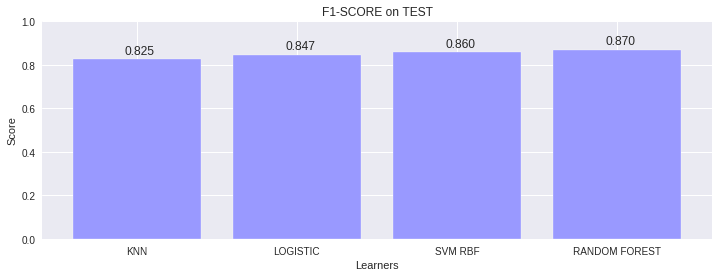

In [66]:
fig = plt.figure(figsize=(12,4))

learners = len(f1_score_test)
M = np.arange(learners)

plt.bar(M, f1_score_test, facecolor='#9999ff', edgecolor='white')

for x, y in zip(M, f1_score_test):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
    
LABELS=["KNN","LOGISTIC","SVM RBF","RANDOM FOREST"]
plt.xticks(np.arange(learners), LABELS)
plt.title("F1-SCORE on TEST")   
plt.xlabel("Learners")  
plt.ylabel("Score") 
plt.ylim(0,1)
plt.show()